<p style = "font-size : 50px; color : #532e1c ; font-family : 'Comic Sans MS'; text-align : center; background-color : #bedcfa; border-radius: 5px 5px;"><strong>Diabetes Prediction</strong></p>

Diabetes, is a group of metabolic disorders in which there are high blood sugar levels over a prolonged period. Symptoms of high blood sugar include frequent urination, increased thirst, and increased hunger. If left untreated, diabetes can cause many complications. Acute complications can include diabetic ketoacidosis, hyperosmolar hyperglycemic state, or death. Serious long-term complications include cardiovascular disease, stroke, chronic kidney disease, foot ulcers, and damage to the eyes.

<a id = '1.0'></a>
<p style = "font-size : 30px; color : #4e8d7c ; font-family : 'Comic Sans MS';  "><strong>Data Description :-</strong></p>

<ul>
    <li style = "color : #03506f; font-size : 18px; font-family : 'Comic Sans MS';"><strong>Pregnancies: Number of times pregnant</strong></li>
    <li style = "color : #03506f; font-size : 18px; font-family : 'Comic Sans MS';"><strong>Glucose: Plasma glucose concentration a 2 hours in an oral glucose tolerance test</strong></li>
    <li style = "color : #03506f; font-size : 18px; font-family : 'Comic Sans MS';"><strong>BloodPressure: Diastolic blood pressure (mm Hg)</strong></li>
    <li style = "color : #03506f; font-size : 18px; font-family : 'Comic Sans MS';"><strong>SkinThickness: Triceps skin fold thickness (mm)</strong></li>
    <li style = "color : #03506f; font-size : 18px; font-family : 'Comic Sans MS';"><strong>Insulin: 2-Hour serum insulin (mu U/ml)</strong></li>
    <li style = "color : #03506f; font-size : 18px; font-family : 'Comic Sans MS';"><strong>BMI: Body mass index (weight in kg/(height in m)^2)</strong></li>
    <li style = "color : #03506f; font-size : 18px; font-family : 'Comic Sans MS';"><strong>DiabetesPedigreeFunction: Diabetes pedigree functionr</strong></li>
    <li style = "color : #03506f; font-size : 18px; font-family : 'Comic Sans MS';"><strong>Age: Age (years)</strong></li>
    <li style = "color : #03506f; font-size : 18px; font-family : 'Comic Sans MS';"><strong>Cabin : Cabin Number</strong></li>
    <li style = "color : #03506f; font-size : 18px; font-family : 'Comic Sans MS';"><strong>Outcome: Class variable (0 or 1)</strong></li>
</ul>le (0 or 1)

# Importing all the libraries that are needed for ML

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

from mlxtend.plotting import plot_decision_regions
import missingno as msno
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import classification_report
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

## Data Exploration

In [2]:

#file_path = 'diabetes.csv'
diabetes_df = pd.read_csv('diabetesnew.csv')
diabetes_df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2,138,62,35,0,33.6,0.127,47,1
1,0,84,82,31,125,38.2,0.233,23,0
2,0,145,0,0,0,44.2,0.630,31,1
3,0,135,68,42,250,42.3,0.365,24,1
4,1,139,62,41,480,40.7,0.536,21,0
5,0,173,78,32,265,46.5,1.159,58,0
6,4,99,72,17,0,25.6,0.294,28,0
7,8,194,80,0,0,26.1,0.551,67,0
8,2,83,65,28,66,36.8,0.629,24,0
9,2,89,90,30,0,33.5,0.292,42,0


In [3]:
diabetes_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,2000.0,3.70350,3.306063,0.000,1.000,3.000,6.000,17.00
Glucose,2000.0,121.18250,32.068636,0.000,99.000,117.000,141.000,199.00
BloodPressure,2000.0,69.14550,19.188315,0.000,63.500,72.000,80.000,122.00
SkinThickness,2000.0,20.93500,16.103243,0.000,0.000,23.000,32.000,110.00
Insulin,2000.0,80.25400,111.180534,0.000,0.000,40.000,130.000,744.00
BMI,2000.0,32.19300,8.149901,0.000,27.375,32.300,36.800,80.60
DiabetesPedigreeFunction,2000.0,0.47093,0.323553,0.078,0.244,0.376,0.624,2.42
Age,2000.0,33.09050,11.786423,21.000,24.000,29.000,40.000,81.00
Outcome,2000.0,0.34200,0.474498,0.000,0.000,0.000,1.000,1.00


In [4]:
diabetes_df_copy = diabetes_df.copy(deep = True)
diabetes_df_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = diabetes_df_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)

# Showing the Count of NANs
print(diabetes_df_copy.isnull().sum())

Pregnancies                   0
Glucose                      13
BloodPressure                90
SkinThickness               573
Insulin                     956
BMI                          28
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


## Data Visualization

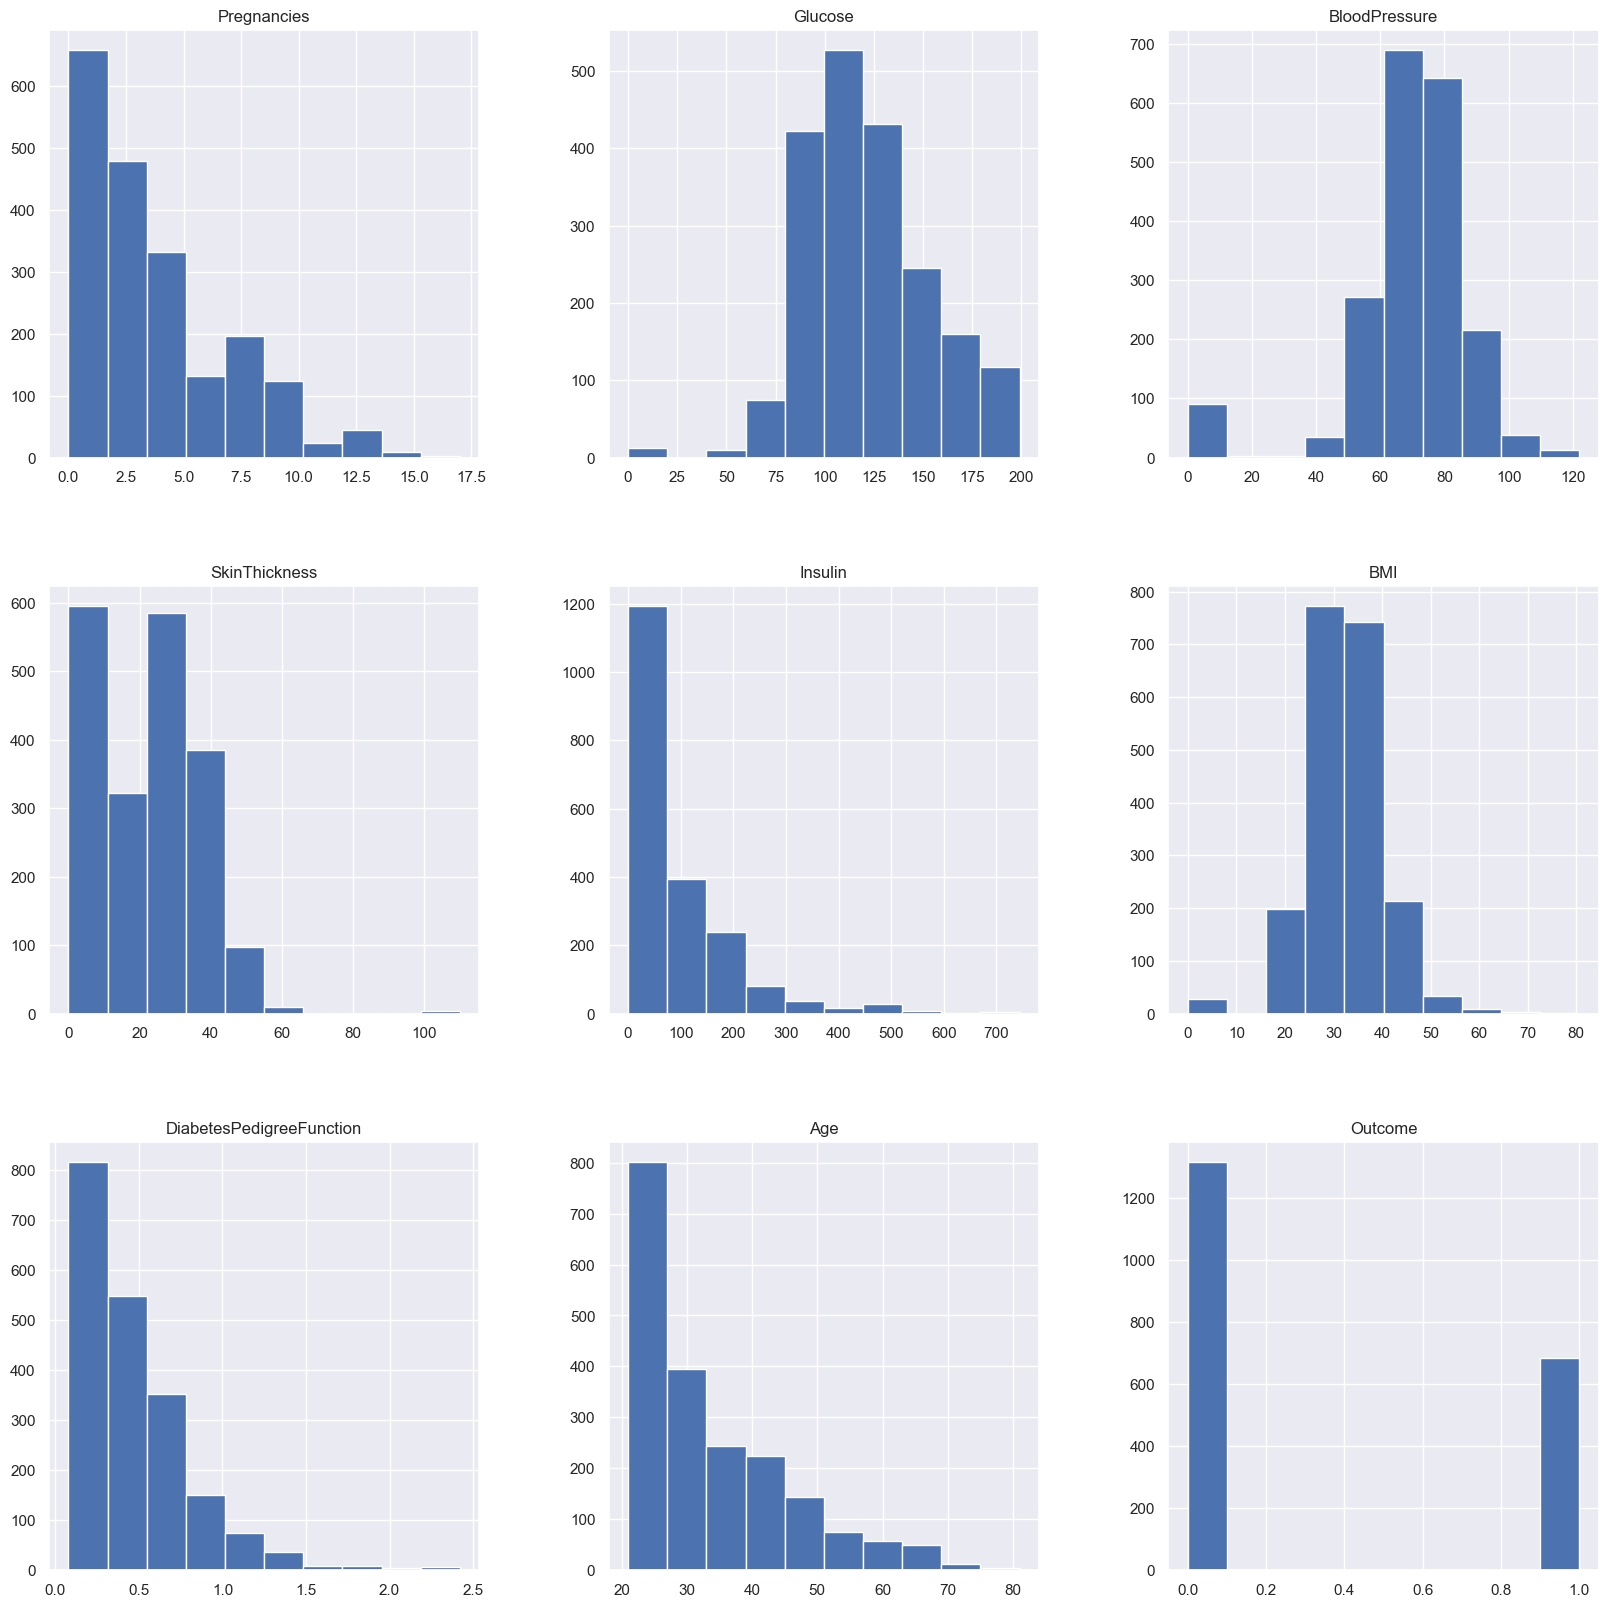

In [5]:
p = diabetes_df.hist(figsize = (20,20))

## Filling the null values

In [6]:
diabetes_df_copy['Glucose'].fillna(diabetes_df_copy['Glucose'].mean(), inplace = True)
diabetes_df_copy['BloodPressure'].fillna(diabetes_df_copy['BloodPressure'].mean(), inplace = True)
diabetes_df_copy['SkinThickness'].fillna(diabetes_df_copy['SkinThickness'].median(), inplace = True)
diabetes_df_copy['Insulin'].fillna(diabetes_df_copy['Insulin'].median(), inplace = True)
diabetes_df_copy['BMI'].fillna(diabetes_df_copy['BMI'].median(), inplace = True)

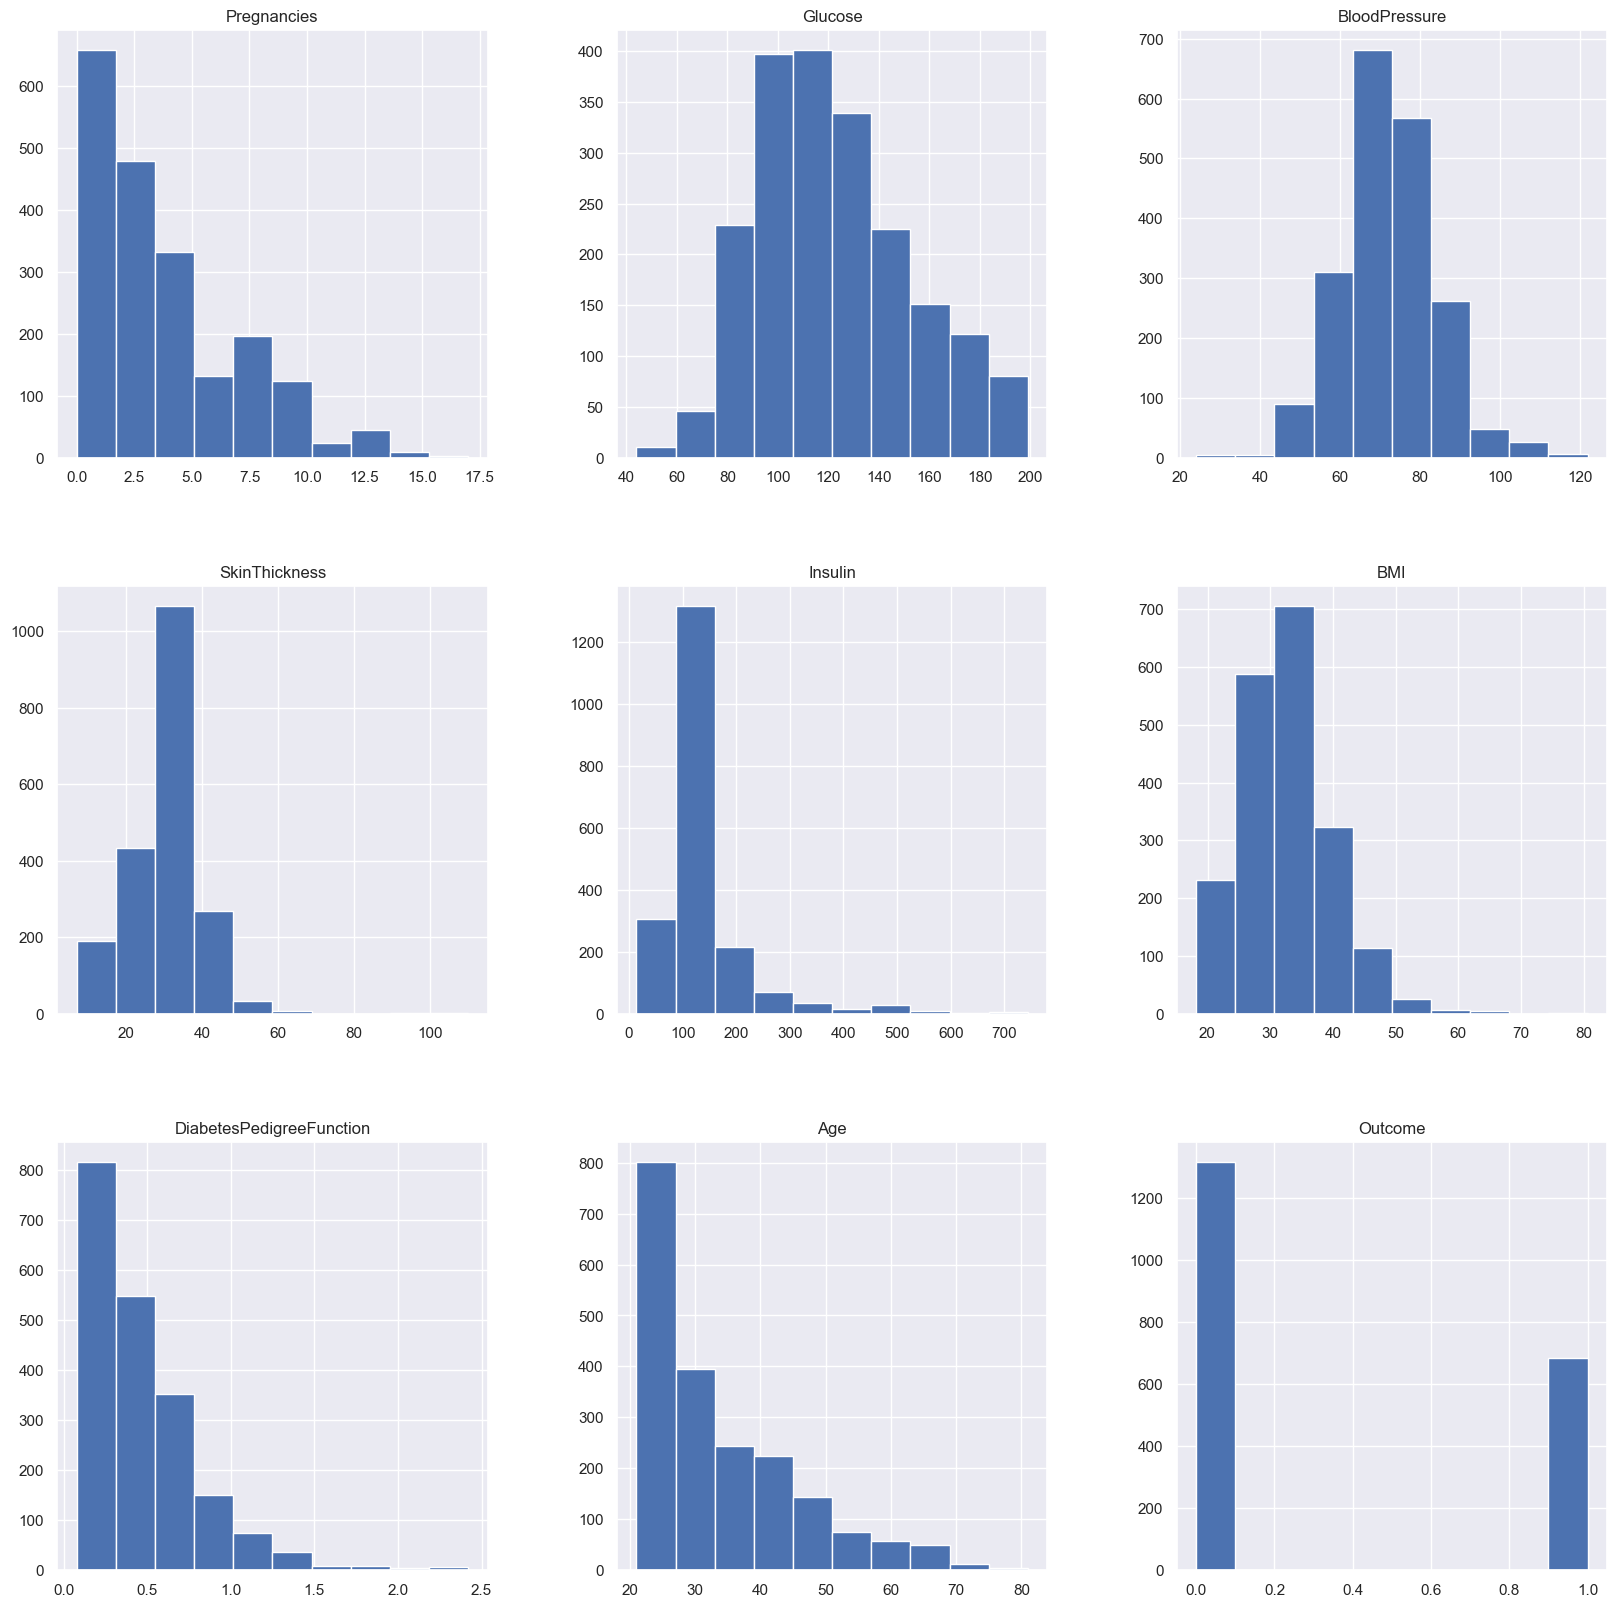

In [7]:
p = diabetes_df_copy.hist(figsize = (20,20))

Outcome
0    1316
1     684
Name: count, dtype: int64


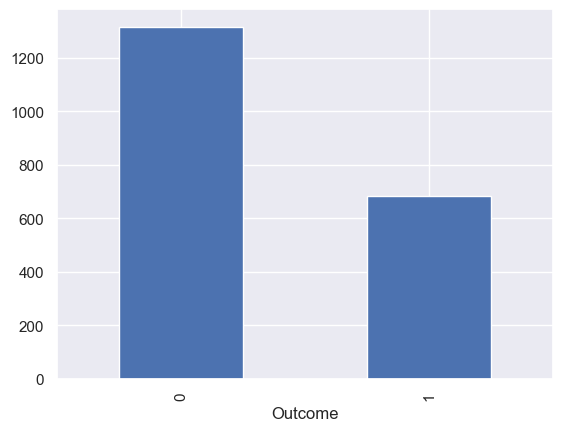

In [8]:
color_wheel = {1: "#0392cf", 2: "#7bc043"}
colors = diabetes_df["Outcome"].map(lambda x: color_wheel.get(x + 1))
print(diabetes_df.Outcome.value_counts())
p=diabetes_df.Outcome.value_counts().plot(kind="bar")

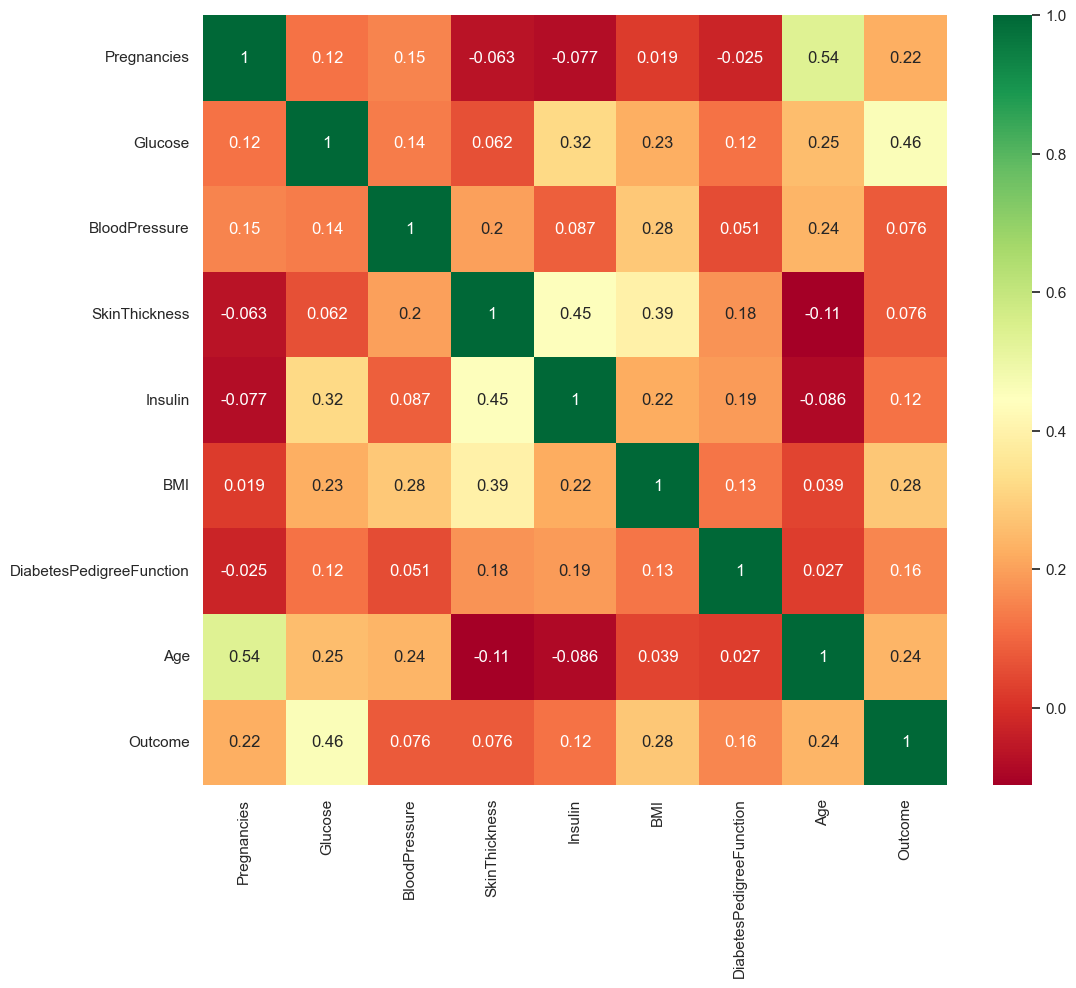

In [9]:
plt.figure(figsize=(12,10))
# seaborn has an easy method to showcase heatmap
p = sns.heatmap(diabetes_df.corr(), annot=True,cmap ='RdYlGn')

In [10]:
sc_X = StandardScaler()
X =  pd.DataFrame(sc_X.fit_transform(diabetes_df_copy.drop(["Outcome"],axis = 1),), columns=[ 'Pregnancies',
'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age'])
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,-0.515394,0.524960,-0.870852,0.631010,-0.177601,0.132630,-1.063246,1.180424
1,-1.120495,-1.244054,0.803273,0.192542,-0.189864,0.772550,-0.735551,-0.856326
2,-1.120495,0.754277,0.000000,-0.026692,-0.177601,1.607229,0.491759,-0.177409
3,-1.120495,0.426682,-0.368614,1.398329,1.343080,1.342914,-0.327478,-0.771462
4,-0.817945,0.557720,-0.870852,1.288712,4.163696,1.120333,0.201161,-1.026055


In [11]:
y = diabetes_df_copy.Outcome
y

0       1
1       0
2       1
3       1
4       0
       ..
1995    0
1996    1
1997    0
1998    1
1999    0
Name: Outcome, Length: 2000, dtype: int64

In [12]:
X = diabetes_df.drop('Outcome', axis=1)
y = diabetes_df['Outcome']
y

0       1
1       0
2       1
3       1
4       0
       ..
1995    0
1996    1
1997    0
1998    1
1999    0
Name: Outcome, Length: 2000, dtype: int64

<p style = "font-size : 50px; color : #532e1c ; font-family : 'Comic Sans MS'; text-align : center; background-color : #bedcfa; border-radius: 5px 5px;"><strong>Models</strong></p>

In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.33,
                                                    random_state=7)

In [14]:
print(y_train)

1081    0
1911    0
1527    1
705     0
1671    0
       ..
1603    0
502     1
537     0
1220    0
175     1
Name: Outcome, Length: 1340, dtype: int64


# **Random Forest Classifier**

In [15]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=200)
rfc.fit(X_train, y_train)

RandomForestClassifier(n_estimators=200)

In [16]:
rfc_train = rfc.predict(X_train)
from sklearn import metrics

print("Accuracy_Score =", format(metrics.accuracy_score(y_train, rfc_train)))

Accuracy_Score = 1.0


In [17]:
#Accuracy
from sklearn import metrics

predictions = rfc.predict(X_test)
print("Accuracy_Score =", format(metrics.accuracy_score(y_test, predictions)*100))

Accuracy_Score = 96.66666666666667


Classification report and confusion matrix of random forest model

In [18]:
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_test, predictions))
print(classification_report(y_test,predictions))

[[424   9]
 [ 13 214]]
              precision    recall  f1-score   support

           0       0.97      0.98      0.97       433
           1       0.96      0.94      0.95       227

    accuracy                           0.97       660
   macro avg       0.96      0.96      0.96       660
weighted avg       0.97      0.97      0.97       660



# **Decision Tree**
Building the model using DecisionTree

In [19]:
from sklearn.tree import DecisionTreeClassifier

dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)

DecisionTreeClassifier()

In [20]:
d_train = dtree.predict(X_train)
from sklearn import metrics

print("Accuracy_Score =", format(metrics.accuracy_score(y_train, d_train)))

Accuracy_Score = 1.0


In [21]:
from sklearn import metrics

predictions = dtree.predict(X_test)
print("Accuracy Score =", format(metrics.accuracy_score(y_test,predictions)*100))

Accuracy Score = 97.27272727272728


In [22]:
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_test, predictions))
print(classification_report(y_test,predictions))

[[429   4]
 [ 14 213]]
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       433
           1       0.98      0.94      0.96       227

    accuracy                           0.97       660
   macro avg       0.97      0.96      0.97       660
weighted avg       0.97      0.97      0.97       660



# **Support Vector Machine (SVM)**

In [23]:
from sklearn.svm import SVC

svc_model = SVC(kernel="linear",random_state=0)
svc_model.fit(X_train, y_train)

SVC(kernel='linear', random_state=0)

In [24]:
from sklearn import metrics
svc_pred = svc_model.predict(X_test)
print("Accuracy Score =", format(metrics.accuracy_score(y_test, svc_pred)*100))

Accuracy Score = 76.66666666666667


In [25]:
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_test, svc_pred))
print(classification_report(y_test,svc_pred))

[[380  53]
 [101 126]]
              precision    recall  f1-score   support

           0       0.79      0.88      0.83       433
           1       0.70      0.56      0.62       227

    accuracy                           0.77       660
   macro avg       0.75      0.72      0.73       660
weighted avg       0.76      0.77      0.76       660



# **KNN - K Nearest Neighbor**

In [26]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors =25, metric = 'minkowski') 
#n_neighbors is 25 bcoz for x_train we got 614 which is near to 25^2
#metric means on what factor choosing so as its KNN so our metric is minkowski i.e., distance
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=25)

In [27]:
#Predicting the data
knn_y_pred = knn.predict(X_test)

In [28]:
from sklearn import metrics
print("Accuracy Score =", format(metrics.accuracy_score(y_test, knn_y_pred)*100))

Accuracy Score = 78.78787878787878


In [29]:
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_test, knn_y_pred))
print(classification_report(y_test,knn_y_pred))

[[382  51]
 [ 89 138]]
              precision    recall  f1-score   support

           0       0.81      0.88      0.85       433
           1       0.73      0.61      0.66       227

    accuracy                           0.79       660
   macro avg       0.77      0.75      0.75       660
weighted avg       0.78      0.79      0.78       660



# **Naive Bayes**

In [30]:
from sklearn.naive_bayes import GaussianNB
nb_classifier = GaussianNB()
nb_classifier.fit(X_train,y_train)

GaussianNB()

In [31]:
nb_y_pred =nb_classifier.predict(X_test)

In [32]:
from sklearn import metrics
print("Accuracy Score =", format(metrics.accuracy_score(y_test, nb_y_pred)*100))

Accuracy Score = 78.03030303030303


# **Logistic Regression**

In [33]:
from sklearn.linear_model import LogisticRegression

In [34]:
diabetesCheck = LogisticRegression(random_state=0)
diabetesCheck.fit(X_train, y_train)
d_log = diabetesCheck.predict(X_train)


In [35]:

# from sklearn import metrics

# print("Accuracy_Score =", format(metrics.accuracy_score(y_train, d_log)))

# accuracy = metrics.accuracy_score(y_train, d_log)
# print("accuracy = ", accuracy )

In [36]:
from sklearn import metrics
predictions = diabetesCheck.predict(X_test)
# print("Accuracy_Score =", format(metrics.accuracy_score(y_train, d_train)))
print("Accuracy Score =", format(metrics.accuracy_score(y_test,predictions)*100))

Accuracy Score = 78.78787878787878


In [37]:
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_test, predictions))
print(classification_report(y_test,predictions))

[[383  50]
 [ 90 137]]
              precision    recall  f1-score   support

           0       0.81      0.88      0.85       433
           1       0.73      0.60      0.66       227

    accuracy                           0.79       660
   macro avg       0.77      0.74      0.75       660
weighted avg       0.78      0.79      0.78       660



In [38]:
feature_names = ["Pregnancies","Glucose",	"BloodPressure","SkinThickness"	,"Insulin",	"BMI","DiabetesPedigreeFunction","Age"]

In [39]:
# feature_importance = pd.DataFrame(feature_names, columns = ["feature"])
# feature_importance["importance"] = diabetesCheck.coef_[0]
# feature_importance = feature_importance.sort_values(by = ["importance"], ascending=False)
 
# from sklearn.linear_model import LogisticRegression
# ax = feature_importance.plot.barh(x='feature', y='importance')
# plt.show()

<Axes: >

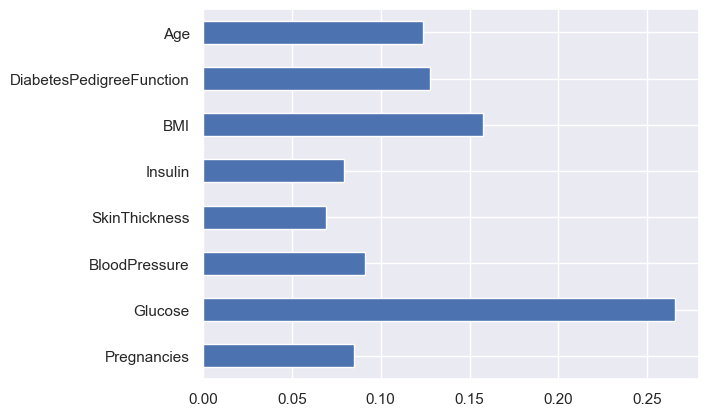

In [40]:
#Important feature for RFC prediction

(pd.Series(rfc.feature_importances_, index=X.columns).plot(kind='barh'))

In [41]:
#import pickle
# Firstly we will be using the dump() function to save the model using pickle
#saved_model = pickle.dumps(rfc)
# Then we will be loading that saved model
#rfc_from_pickle = pickle.loads(saved_model)
# lastly, after loading that model we will use this to make predictions
#rfc_from_pickle.predict(X_test)


In [42]:
import pickle
pickle.dump(rfc, open('diabetesmodel.pkl', 'wb'))

In [43]:
diabetes_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2,138,62,35,0,33.6,0.127,47,1
1,0,84,82,31,125,38.2,0.233,23,0
2,0,145,0,0,0,44.2,0.630,31,1
3,0,135,68,42,250,42.3,0.365,24,1
4,1,139,62,41,480,40.7,0.536,21,0


In [44]:
rfc.predict([[0,145,	0	,0,	0	,44.2,	0.630,	31		]]) #2nd patient
#rfc.predict([[0,84,	82	,31,	125	,38.2,	0.233,	23		]]) #1st patient

array([1], dtype=int64)

In [45]:
diabetes_df.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
1995,2,75,64,24,55,29.7,0.370,33,0
1996,8,179,72,42,130,32.7,0.719,36,1
1997,6,85,78,0,0,31.2,0.382,42,0
1998,0,129,110,46,130,67.1,0.319,26,1
1999,2,81,72,15,76,30.1,0.547,25,0


In [46]:
x=rfc.predict([[2,81,	72,	15,	76,	30.1	,0.547,	25]])  # 1999 th patient
#x=rfc.predict([[0,129,	110,	46,	130,	67.1,	0.319,	26]])  # 1998 th patient
if(x>=1):
  print("Patient has diabetes")
else:
  print("No diabetes")

No diabetes
